# Statistical Analytics for Test Set Prdiction
In this notebook, we will first preprocess and visualize the *FuelConsumptionCo2* dataset, and second, develop a Linear Regression model for data prediction for yet unknown Co2 emission points with respect to a given variable.

Missing value prediction is becoming more and more important in today's datasets due to the fact that most of these datsets do contain missing values or maybe it's crucial to predict the target feature for unknown input features in the dataset. Here, we'll be using a very simple, linear model for this prediction and will apply that to the most linear feature with the target feature as the input. There are much better functions that can predict out output as multiple variables may come into play, though our current model will be much more basic.

**Precedural Clarification**: This process, after the inclusion of the nesseccery packages and the dataset, includes several data visulization steps for gaining more intuition into the data at certain points; a preprocesssing step, for getting more robust, optimized, and regularized outputs; and a final Linear Regression implementation for data prediction with respect to a number of variables.

## 1 - Packages
First, we import all the python packages that we'll need during this assignment.

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting matplotlib plotting options
plt.rcParams['axes.titlesize'] = 12

%matplotlib inline

## 2 - Dataset
We will use the *FuelConsumptionCo2* dataset as given in the input for this problem. This dataset contains a set of data about a number of cars with their respective technical specifictions and the correspoding average fuel consumption as calculated under different circumstances. We use this data to derive our test/train sets as well.

The dataset fields are as follows:
- Production Year
- Make
- car Model
- Class
- Engine Size
- Number of Cylindars
- Transmission Type
- Fuel Type
- Fuel Consumption: City
- Fuel Consumption: Hwy
- Fuel Consumption: City and Hwy
- Fuel Consumption [MPG]: City and Hwy
- Co2 Emissions

First, we load the dataset into a pandas *DataFrame*. For this, we call `read_csv()` on the input file.

In [296]:
df = pd.read_csv('datasets/FuelConsumptionCo2.csv')

### 2.1 - Dataset Description
In the following section, we'll show the structure of the dataset. This includes:
- The use of `head()` to get the 5 rows at the top of the dataset
- The use of `tail()` to get the 5 bottom most row of the dataset
- The use of `describe()` for an overall summary view of the dataset contents

In [297]:
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244.0


In [298]:
df.tail()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1063,1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25,264.0
1064,1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1065,1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25,260.0
1066,1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,14.9,10.2,12.8,22,294.0


In [299]:
df.describe()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1040.000000,1033.000000,1067.000000,1067.000000,1067.000000,1067.000000,964.000000
mean,533.000000,2014.0,3.324038,5.797677,13.296532,9.474602,11.580881,26.441425,256.741701
std,308.160672,0.0,1.411400,1.807262,4.101253,2.794510,3.485595,7.468702,63.265308
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,209.000000
50%,533.000000,2014.0,3.300000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.200000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


### 2.2 - Overall Dataset Info
Next, we call `info()` on the dataset to get data types (dTypes) of each of the columns. These will include two main categories: numerical and non-numerical. 

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1058 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1040 non-null   float64
 6   CYLINDERS                 1033 non-null   float64
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  996 non-null    object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              964 non-null    float64
dtypes: float

<font color='blue'>
As driven from the above output, the numrical types consist of `float64`  and `int64`, and non-nemrcals are only of type: `object`.
 
<font color='black'>
    
    
    

    
<b>Data Labling</b>: One way to process non-numerical columns further, is to label each corresponding column of type *object* in a numerical format. For this, we'll be converting `object` typed rows into Pandas Categorties and then using those to replace the actual column to get the column encoded in integers. 

In fact, in the following piece of code, each line corresponds to the categorial code extraction along with the subsequent column replacement.

In [301]:
df['MAKE'] = df['MAKE'].astype('category').cat.codes
df['MODEL'] = df['MODEL'].astype('category').cat.codes
df['VEHICLECLASS'] = df['VEHICLECLASS'].astype('category').cat.codes
df['TRANSMISSION'] = df['TRANSMISSION'].astype('category').cat.codes
df['FUELTYPE'] = df['FUELTYPE'].astype('category').cat.codes

# get the head of the df
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,0,329,0,2.0,4.0,10,3,9.9,6.7,8.5,33,196.0
1,1,2014,0,329,0,2.4,4.0,20,3,11.2,7.7,9.6,29,221.0
2,2,2014,0,330,0,1.5,4.0,17,3,6.0,5.8,5.9,48,136.0
3,3,2014,0,389,11,3.5,6.0,11,3,12.7,9.1,11.1,25,NaN
4,4,2014,0,482,11,3.5,6.0,11,3,12.1,8.7,10.6,27,244.0


In [302]:
# get data types of the columns of the df
df.dtypes

Unnamed: 0                    int64
MODELYEAR                     int64
MAKE                           int8
MODEL                         int16
VEHICLECLASS                   int8
ENGINESIZE                  float64
CYLINDERS                   float64
TRANSMISSION                   int8
FUELTYPE                       int8
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                float64
dtype: object

<font color='green'>
Seems like data labling has been successful. All columns have been labled correctly in numerical values.

### 2.3 - Replace Missing values
In this step, we'll find and replace corrupted values such as NaN's in the dataframe. This is done via replacing each of the NaN's, with their respective column mean value. This would impose some advantages as well as a number of disadvantages:

**Pros**:
- Allows preceding without the removal of rows containing NaN values
- Slightly reduces the effect of outliers in the dataset (not as much as replacing with the median)
**Cons**:
- Introduces further noise to the data, as we're not neccessarily replacing the missing values with their original, correct values

**Note**: An indirect of effect adding this noise is a slight regularization effect added to the data for DL training. This is because of the fact that we're, by definition, sort of adding a dropout layer with a small `1 - keep_prob`, where the value of `keep_prob` is determined by the level of noise introduced; randomly supressing a number of units' activation in the corresponding layer. But this is just a side effect of this and not to be considered a major influence currently.

First, in the following cell, we count the number of missing values in each clumn taking the sum of all the values evaluted to missing, as denoted by Pandas `isna()`, along each of the columns:

In [303]:
def count_nan(df):
    return df.isna().sum(axis=0) #axis=0 indicates that we're summing along the vertical axis

count_nan(df)

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         0
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

Next, we'll replace the missing values with the mean of column they currently reside in in the following cell. Note that we'll not replace these values in the `CO2EMISSIONS` column as we're to try to predict them using a simple LR model, later in this notebook.

`fillna()` will automatically replace each NaN with the corresponding in the given argument. This will be along axis 0 by default.

In [304]:
df_mean = df.mean(axis=0) # Computing the mean of each of the columns in the dataframe

# Replacing missing values in ENGINESIZE and CYLINDERS columns with the column mean
df.iloc[:, :-1] = df.iloc[:, :-1].fillna(df_mean)

# Count the number of missing values
count_nan(df)

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         0
VEHICLECLASS                  0
ENGINESIZE                    0
CYLINDERS                     0
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64

<font color='green'>
    
All missing values except in the CO2EMISSIONS column are replaced by column means and the opration has been successful.

## 3 - Dataset Visualization

### 3.1 - Pandas Vectorization
In this section, we'll be calculating the mean of the `FUELCONSUMPTION_CITY` for rows with `CO2EMISSIONS` lower than 240 and 300 respectively in two different ways. First, we'll calculate it using Pandas vectroization which parallelizes the process, and second, we calculate the same thing in a for loop. From the results, the for loop implementation would turn out to be a lot slower in speed.

In the following cell, let's do a pandas implementation of this mean claculation process along column `FUELCONSUMPTION_CITY` only for cars that have `CO2EMISSIONS` less than the two given values and take the average running time for each one using `timeit`, an easy to use timing  extension to Jupyter Notebook:

In [11]:
fuelcons_city240 = (df['FUELCONSUMPTION_CITY'])[df['CO2EMISSIONS']<240]
fuelcons_city300 = (df['FUELCONSUMPTION_CITY'])[df['CO2EMISSIONS']<300]
# fuelcons_city[df['CO2EMISSIONS']<1000]

In [12]:
fuelcons_city240 = (df['FUELCONSUMPTION_CITY'])[df['CO2EMISSIONS']<240]
fuelcons_city300 = (df['FUELCONSUMPTION_CITY'])[df['CO2EMISSIONS']<300]
print('FUELCONSUMPTION_CITY for CO2EMISSIONS < 240 mean is calculated as: {}'.format(fuelcons_city240.mean()))
%timeit fuelcons_city240.mean()
print('\n')
print('FUELCONSUMPTION_CITY for CO2EMISSIONS < 300 mean is calculated as: {}'.format(fuelcons_city300.mean()))
%timeit fuelcons_city300.mean()

FUELCONSUMPTION_CITY for CO2EMISSIONS < 240 mean is calculated as: 10.037819025522042
33.1 µs ± 3.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


FUELCONSUMPTION_CITY for CO2EMISSIONS < 300 mean is calculated as: 11.829773030707624
30.7 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Next, We'll define a function and use it to calculate this mean using a for loop along the given column. This consists of first taking the summation over all values in the given array and then dividing it by the number of total entries.

In [13]:
fuelcons_city240 = (df['FUELCONSUMPTION_CITY'])[df['CO2EMISSIONS']<240]
fuelcons_city300 = (df['FUELCONSUMPTION_CITY'])[df['CO2EMISSIONS']<300]

def take_series_mean(series):
    sum = 0
    for i in range(series.shape[0]):
        sum += series.iloc[i]
    return sum/series.shape[0]

print('FUELCONSUMPTION_CITY for CO2EMISSIONS < 240 mean is calculated as: {}'.format(fuelcons_city240.mean()))
%timeit take_series_mean(fuelcons_city240)
print('\n')
print('FUELCONSUMPTION_CITY for CO2EMISSIONS < 300 mean is calculated as: {}'.format(fuelcons_city300.mean()))
%timeit take_series_mean(fuelcons_city300)

FUELCONSUMPTION_CITY for CO2EMISSIONS < 240 mean is calculated as: 10.037819025522042
2.69 ms ± 541 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


FUELCONSUMPTION_CITY for CO2EMISSIONS < 300 mean is calculated as: 11.829773030707624
4.09 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Turns out while both implementations yield the same value for the final means, the first, vectorized version performs much faster in terms of the running time. 

On average we get $$\frac{2690 + 4090}{33.1 + 30.7}*100\approx\%10626.95$$ speedup in the vectorized implementation over the loopy version.

### 3.2 - Histogram Visualization of The Columns
We show a histogram of each of the columns in the dataset using Pandas' `hist()`. Using a histogram chart, one will be able to see the statistical distribution of the data for further visual analysis.

In this section, we will use a for loop to iterate over all the histograms and plot  

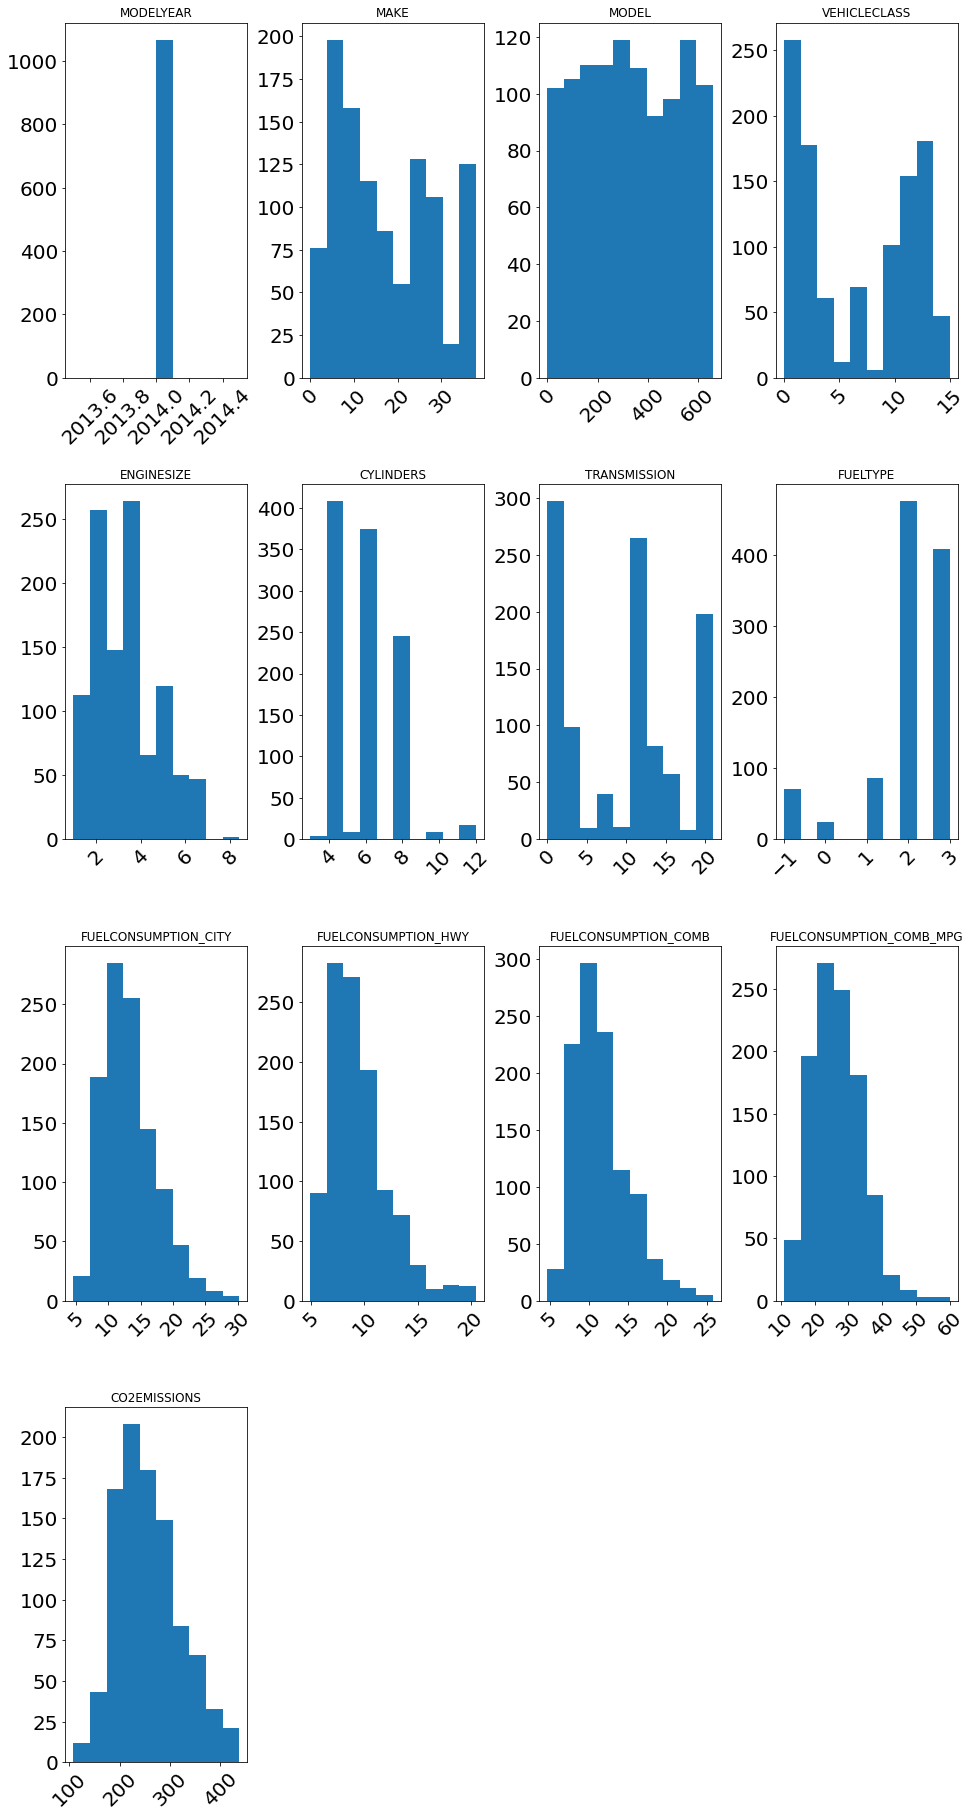

In [310]:
hists = df.iloc[:, 1:].hist(figsize=(16, 32), xlabelsize=20, ylabelsize=20, 
                            xrot=45, grid = False)

<font color='blue'>
Each histogram shows how values of each column of the dataset are distributed, showing what number of values are in each of the given ranges.

## 4 - Machine Learning Model
In this section, we run a Linear Regression model on the data to predict values of the last row for test set examples. This will include normalization, feature engineering/selection, cost calculation, and parameter optimization steps.

**Note**: As we'll not be *training* an actual model in here and just guessing values for parameters of the model so to have more or less an optimized cost on the test set, we'll be ommiting the common forward and back propagation steps; as well as the cost optimization phase based on them.

### 4.1 - Avoid  Non-Numerical Columns in the Prediction
In this section, we'll be eliminating the categorical columns from the dataset, so they don't come in the later linearity checks.

In the following cell, we're deleting all the columns with type `object` from the dataset using `drop()` and saving the result in `df_num`:

In [311]:
df_num = df.drop(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
df_num.info() #print info of the column types of df_num for verification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   ENGINESIZE                1067 non-null   float64
 3   CYLINDERS                 1067 non-null   float64
 4   FUELCONSUMPTION_CITY      1067 non-null   float64
 5   FUELCONSUMPTION_HWY       1067 non-null   float64
 6   FUELCONSUMPTION_COMB      1067 non-null   float64
 7   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 8   CO2EMISSIONS              964 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 75.1 KB


<font color='green'>
    
All such columns have been successfully removed from the dataframe.

### 4.2 - Normalization
We normalize data in columns so to make learning contours more circular, making learning faster overall. This would also have a slight positive effect on how the model happens to predict on the test set later on, as this makes the model less prone to extreme distribution changes in test examples, keeping the distribution of all examples almost the same all the time. 

In the cell below, we're performing this by subtracting the column mean from each example, and taking them over the standard diviation of the column:

In [312]:
df_num_norm = (df_num - df_num.mean())/df_num.std()

print('df_num_norm mean: \n\n{}\n'.format(df_num_norm.mean()))
print('df_num_norm standard deviation: \n\n{}\n'.format(df_num_norm.std()))

df_num_norm  #Print df_num_norm

df_num_norm mean: 

Unnamed: 0                 -1.107101e-16
MODELYEAR                            NaN
ENGINESIZE                  5.326573e-15
CYLINDERS                  -1.466337e-16
FUELCONSUMPTION_CITY       -4.037383e-15
FUELCONSUMPTION_HWY         4.665122e-16
FUELCONSUMPTION_COMB       -2.787211e-15
FUELCONSUMPTION_COMB_MPG   -2.527396e-16
CO2EMISSIONS                4.002101e-16
dtype: float64

df_num_norm standard deviation: 

Unnamed: 0                  1.0
MODELYEAR                   NaN
ENGINESIZE                  1.0
CYLINDERS                   1.0
FUELCONSUMPTION_CITY        1.0
FUELCONSUMPTION_HWY         1.0
FUELCONSUMPTION_COMB        1.0
FUELCONSUMPTION_COMB_MPG    1.0
CO2EMISSIONS                1.0
dtype: float64



,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-1.729617,NaN,-0.950214,-1.010949,-0.828169,-0.992876,-0.883890,0.878141,-0.960111
1,-1.726372,NaN,-0.663149,-1.010949,-0.511193,-0.635031,-0.568305,0.342573,-0.564949
2,-1.723127,NaN,-1.309046,-1.010949,-1.779098,-1.314936,-1.629817,2.886522,-1.908498
3,-1.719882,NaN,0.126281,0.113779,-0.145451,-0.134049,-0.137962,-0.192995,NaN
4,-1.716637,NaN,0.126281,0.113779,-0.291748,-0.277187,-0.281410,0.074789,-0.201401
...,...,...,...,...,...,...,...,...,...
1062,1.716637,NaN,-0.232551,0.113779,0.025228,0.116442,0.062864,-0.326887,0.225373
1063,1.719882,NaN,-0.089018,0.113779,-0.023537,0.009089,-0.023204,-0.192995,0.114728
1064,1.723127,NaN,-0.232551,0.113779,0.025228,0.116442,0.062864,-0.326887,0.225373
1065,1.726372,NaN,-0.089018,0.113779,-0.096686,-0.062480,-0.080583,-0.192995,0.051502


**Note**: `MODELYEAR` column has taken NaN values beacause of division by $std=0$.

<font color='green'>
As expected, every column has standard deviation of one and means much closer to zero.

### 4.3 - Linearity Check
Here we find which features are more linear with the goal feature that we need to predict; so to better be able to predict based on that feature with a Linear Regression model.

In the cell below, we plot the scatter chart of the `CO2EMISSIONS`, the goal column, with respect to all other fatures in `df_num_norm`. Also,we're using `Matplotlib` instead of vanilla raw `Pandas` for the plotting:

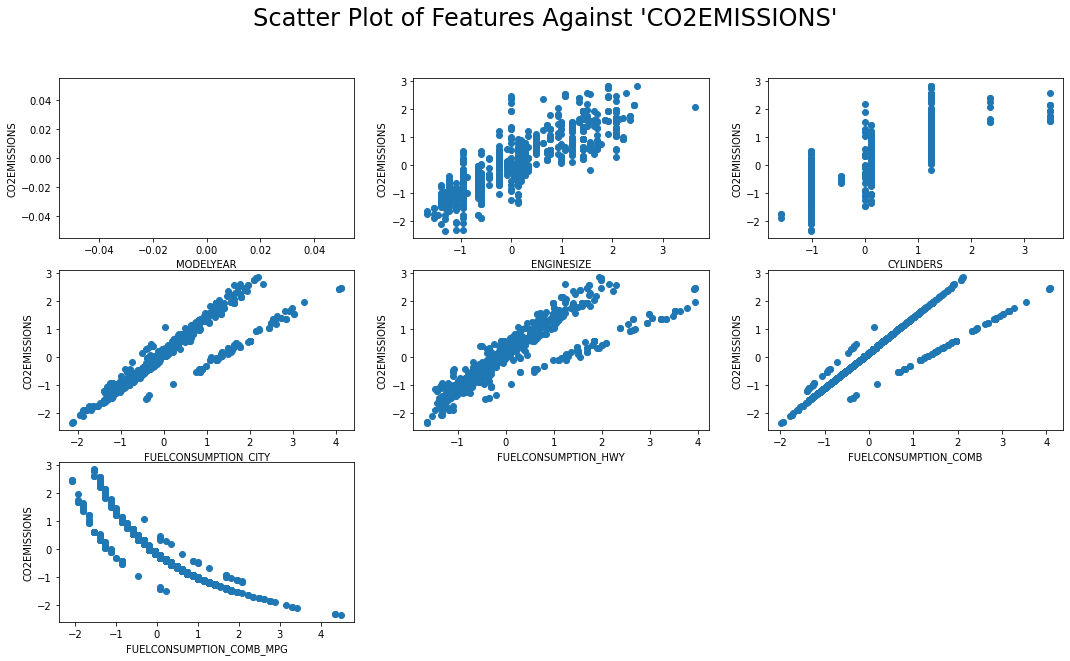

In [313]:
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Scatter Plot of Features Against \'CO2EMISSIONS\'', fontsize=24)
i = 0
for col in df_num_norm:
    if col=='CO2EMISSIONS' or col== 'Unnamed: 0':
        continue
    i += 1
    plt.subplot(3, 3, i)
    curr_arr = np.array(df_num_norm[col])
    plt.scatter(curr_arr, df_num_norm['CO2EMISSIONS'])
    plt.xlabel(col)
    plt.ylabel('CO2EMISSIONS')

<font color='blue'>
Turns out from the above plots that `ENGINESIZE` is scattered most linear to the `CO2EMISSIONS` column in `df_num_norm`. Note that `MODELYEAR` has taken NaN values and therefore not plotted against.

**Note**: We selected `ENGINESIZE` because it seems like <u>one line</u> can fit `CO2EMISSIONS` well based on the `ENGINESIZE` feature.

Now we make a new dataframe out of the two features selected: `CO2EMISSIONS`and `ENGINESIZE`:

In [314]:
lr_df = df_num_norm[['ENGINESIZE', 'CO2EMISSIONS']]
lr_df

,ENGINESIZE,CO2EMISSIONS
0,-0.950214,-0.960111
1,-0.663149,-0.564949
2,-1.309046,-1.908498
3,0.126281,NaN
4,0.126281,-0.201401
...,...,...
1062,-0.232551,0.225373
1063,-0.089018,0.114728
1064,-0.232551,0.225373
1065,-0.089018,0.051502


### 4.4 - Hypothesis
$h_\theta$ would be our hypothesis that would be used to predict the `CO2EMISSIONS`. The below function calculated the hypothesis:

In [315]:
def hypothesis(X, theta):
    if len(theta) != 2:
        raise Exception('Theta not in expected shape.')
    return theta[0] * X + theta[1]

### 4.5 - Cost
Here we use Mean Square Error (MSE) for the cost calculation. The function would be defined as:

$$\frac{1}{N}\sum{(y_i-h_\theta(x))^2}$$ where $h_\theta$ is the hypothesis function applied to each example and $y_i$ is the target value. The following function computes the cost. Here we use vectorized operations for cost calculation. This ensures further optimization of speed as we won't iterate across all data examples.

In [316]:
def cost(X, Y, theta):
    h_theta = hypothesis(X, theta)
    return ((Y - h_theta)**2).sum()/X.shape[0]

### 4.6 - Getting Train/Test Sets
Here we would take all rows with values not missing in the `CO2EMISSION` column of `lr_df` as train set. The rest of the examples will comprimise our test set for future use.

In [317]:
lr_df_nan = lr_df.isna().any(axis=1) # Select which rows have NaN values (by implication in `CO2EMISSIONS` column)

train_X = (lr_df[lr_df.isna().any(axis=1) == 0])['ENGINESIZE']
test_X = (lr_df[lr_df.isna().any(axis=1) == 1])['ENGINESIZE']

train_Y = (lr_df[lr_df.isna().any(axis=1) == 0])['CO2EMISSIONS']
test_Y = (lr_df[lr_df.isna().any(axis=1) == 1])['CO2EMISSIONS']

print('train_X shape is: {}'.format(train_X.shape))
print('test_X shape is: {}\n'.format(test_X.shape))

print('train_Y shape is: {}'.format(train_Y.shape))
print('test_Y shape is: {}'.format(test_Y.shape))

train_X shape is: (964,)
test_X shape is: (103,)

train_Y shape is: (964,)
test_Y shape is: (103,)


<font color='green'>
Train/test examples have been successfully seperated in form of X and Y sets.

**Note**: We later make test prediction results unnormalized by doing the inverse computations.

### 4.7 - Optimization
Here we don't actually train the model through back-propagation. We instead calculate cost using random theta and select a theta with the least computed cost as optimal. Note that the error may not be fully minimized, but taking enough random values for theta, hopefully we can approach a well optimized cost.

Here we use random vectors for theta and compute cost based on each until we reach a cost of less than `0.5`. We later will take this cost as optimal and predict based on the corresponding theta vector for that cost. We also use a certain random seed to get consistent results across all executions.

In [318]:
np.random.seed(10289) # Set random seed for results to be consistent
Theta = [0, 0]
min_cost = 0.5 # No cost value larger than 0.5 is acceptable.
while(True):
    theta = np.random.randn(2)
    c = cost(train_X, train_Y, theta)
    if c < min_cost:
        min_cost = c
        Theta = theta
        break
        
print('Computed cost: {}'.format(min_cost))
print('Final Theta: {}'.format(Theta))

Computed cost: 0.2654364334772353
Final Theta: [ 0.88617718 -0.07695464]


<font color='green'>
The cost is $\approx0.23<0.5$ which obviously fits our need.

<font color='black'>


<b>Note</b>: Here we used small (near zero) values for Theta as our data is normalized and seems like normalized values for `Theta` also work well for cost optimization.

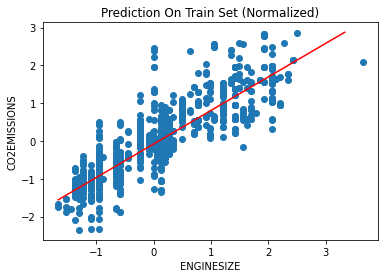

In [319]:
plt.scatter(train_X, train_Y)

x = np.arange(train_X.min(), train_X.max())
plt.plot(x, x*Theta[0] + Theta[1], 'r')

plt.title('Prediction On Train Set (Normalized)', fontsize=12)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

<font color='blue'>
The above chart shows how our linear model predicts `CO2EMISSIONS` on the training set. The red line seemingly fits well through the training examples.

### 4.8 - Test Set Prediction
We now use the developed linear model to predict values of `CO2EMISSIONS` on the test set. In the following cell, we apply this linear function to each training eample in the test set for prediction:

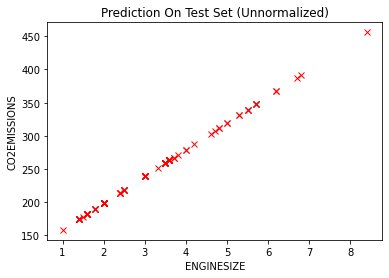


Predicted values on the test set:



3       258.953003
20      198.600088
30      238.835365
42      238.835365
43      238.835365
           ...    
1022    198.600088
1027    198.600088
1051    198.600088
1052    198.600088
1053    198.600088
Name: ENGINESIZE, Length: 103, dtype: float64

In [320]:
# We multiply by stand deviation and add the mean of the respective column so to make unnormalized predictions.
h_theta = (test_X * Theta[0] + Theta[1]) * df_num.std()['CO2EMISSIONS'] + df_num.mean()['CO2EMISSIONS']
plt.plot(test_X * df_num.std()['ENGINESIZE'] + df_num.mean()['ENGINESIZE'], h_theta, 'rx')

plt.title('Prediction On Test Set (Unnormalized)', fontsize=12)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

print('\nPredicted values on the test set:\n')
h_theta

We also save the predicted values of `CO2EMISSION` in a csv file:

In [327]:
h_theta.to_csv('pred_out.csv')

<font color='green'>
The model is predicting on the test set in a linear basis. The linear prediction has been successful.

## Conclusion
In this notebook, we developed a model for `CO2EMISSIONS` prediction on the derived test set with respect to the `ENGINESIZE` column. `ENGINESIZE` was selected based on a linearity comparison of all features in the dataset with respect to the target column, as this was the most linear. We then used this featue as the training `X` for `CO2EMISSIONS` prediction and took out an semi-optimized $\theta$ vector for linear modelling and used that for test set prediction.

**Note**: We also went through a number of other steps like normalization and distribution visualization in terms of histograms along the project that were essential for better final prediction.

If we'd used other non-linear functions for this target prediction, we'd pottentially got better results along the train/test sets and would rather get much smaller values for the cost, which could be taken as a solution for model improvement. Our current model is rather suffering from a high-bias problem as it's not predicting much well along even our train set. This colud be treated using a more complex model.

## References
- [Pandas Documentation](https://pandas.pydata.org/)
- [How do I set the figure title and axes labels font size in Matplotlib?](https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib)